In [90]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
import pickle
plt.rcParams["figure.figsize"] = (10,10)

In [20]:
x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')
y_train = pd.read_csv("y_train.csv")['class']
y_test = pd.read_csv('y_test.csv')['class']

In [21]:
def prec_0(y_true, y_pred):
    mask_true = (y_true == 0)
    mask_pred = (y_pred == 0)
    true_pos = (mask_true & mask_pred).sum()
    return true_pos/(mask_pred).sum()

def rec_0(y_true, y_pred):
    mask_true = (y_true == 0)
    mask_pred = (y_pred == 0)
    true_pos = (mask_true & mask_pred).sum()
    return true_pos/(mask_true).sum()

def prec_1(y_true, y_pred):
    mask_true = (y_true == 1)
    mask_pred = (y_pred == 1)
    true_pos = (mask_true & mask_pred).sum()
    return true_pos/(mask_pred).sum()

def rec_1(y_true, y_pred):
    mask_true = (y_true == 1)
    mask_pred = (y_pred == 1)
    true_pos = (mask_true & mask_pred).sum()
    return true_pos/(mask_true).sum()

def prec_2(y_true, y_pred):
    mask_true = (y_true == 2)
    mask_pred = (y_pred == 2)
    true_pos = (mask_true & mask_pred).sum()
    return true_pos/(mask_pred).sum()

def rec_2(y_true, y_pred):
    mask_true = (y_true == 2)
    mask_pred = (y_pred == 2)
    true_pos = (mask_true & mask_pred).sum()
    return true_pos/(mask_true).sum()

def eval_score(y_true, y_pred):
    scores = {'prec_0':prec_0(y_true, y_pred),
              'rec_0':rec_0(y_true, y_pred),
              'prec_1':prec_1(y_true, y_pred),
              'rec_1':rec_1(y_true, y_pred),
              'prec_2':prec_2(y_true, y_pred),
              'rec_2':rec_2(y_true, y_pred)}
    return scores

In [22]:
scores = {'prec_0':make_scorer(prec_0),
          'rec_0':make_scorer(rec_0),
          'prec_1':make_scorer(prec_1),
          'rec_1':make_scorer(rec_1),
          'prec_2':make_scorer(prec_2),
          'rec_2':make_scorer(rec_2)}

In [23]:
def plot(result, x, cols, title, x_label, y_label, param, model_name, address):
    for col in cols:
        plt.plot(x, result[f'mean_train_{col}'], label = f'{col}_train', linestyle = '--', marker = 'o')
        plt.plot(x, result[f'mean_test_{col}'], label = f'{col}_test')
        plt.title(f'{title}/{col}')
        plt.legend()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.savefig(f'charts/{model_name}/{address}_{param}_{col}.jpg')
        plt.figure()
        

## Standard Scaling
### rbf kernel

In [24]:
std_pipe = Pipeline([('transformer', StandardScaler()),
                     ('model', SVC())])

In [45]:
std_grid = GridSearchCV(estimator = std_pipe,
                       param_grid = {'model__class_weight':[{0:1,1:1,2:i} for i in np.linspace(1, 3, 20)]},
                       n_jobs = -1,
                       scoring = scores,
                       return_train_score = True,
                       refit = 'prec_0')

In [46]:
std_grid.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [{0: 1, 1: 1, 2: 1.0},
                                                 {0: 1, 1: 1,
                                                  2: 1.1052631578947367},
                                                 {0: 1, 1: 1,
                                                  2: 1.2105263157894737},
                                                 {0: 1, 1: 1,
                                                  2: 1.3157894736842106},
                                                 {0: 1, 1: 1,
                                                  2: 1.4210526315789473},
                                                 {0: 1, 1: 1,
                                                  2: 1.526315789473684},
                                                 {0: 1, 1: 1,
                               

In [47]:
std_result = pd.DataFrame(std_grid.cv_results_)

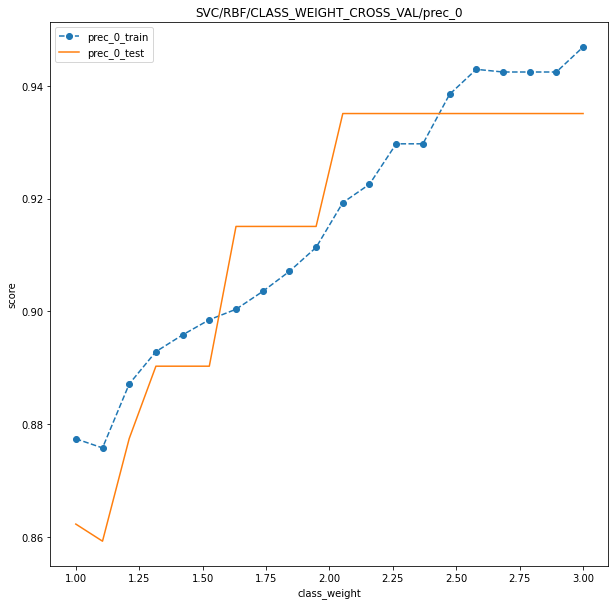

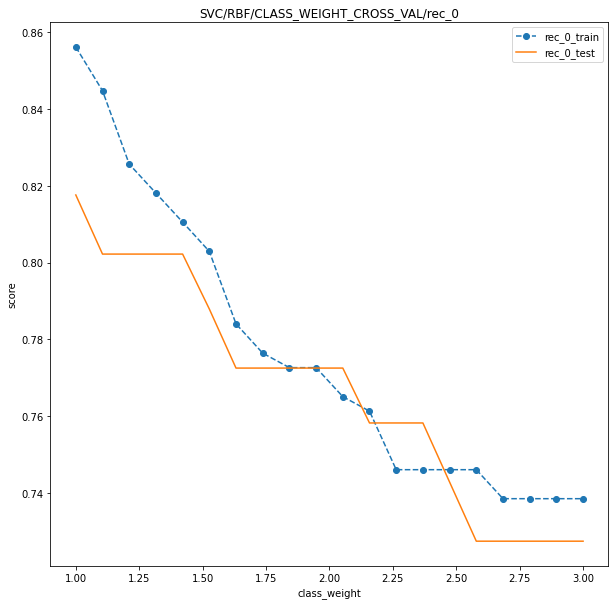

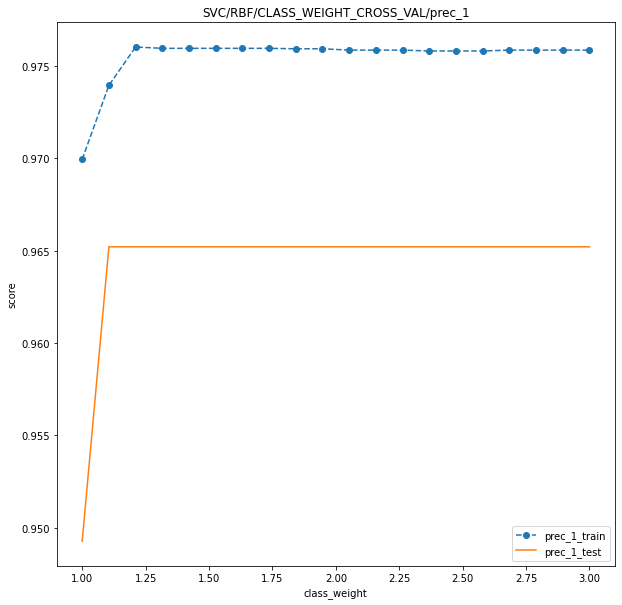

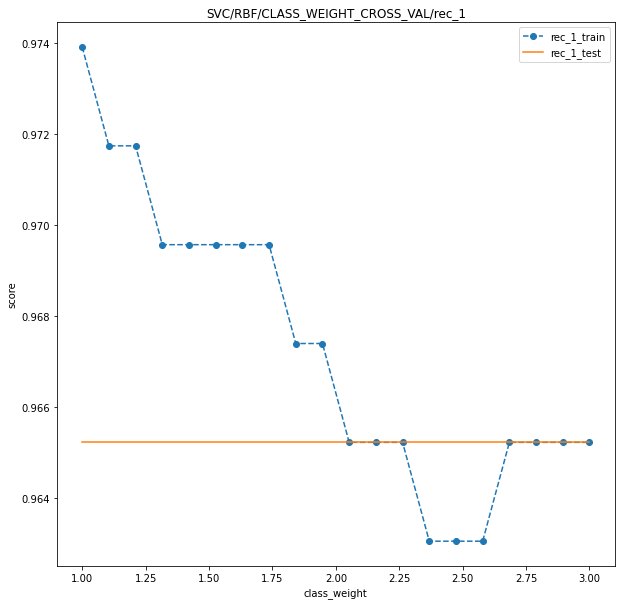

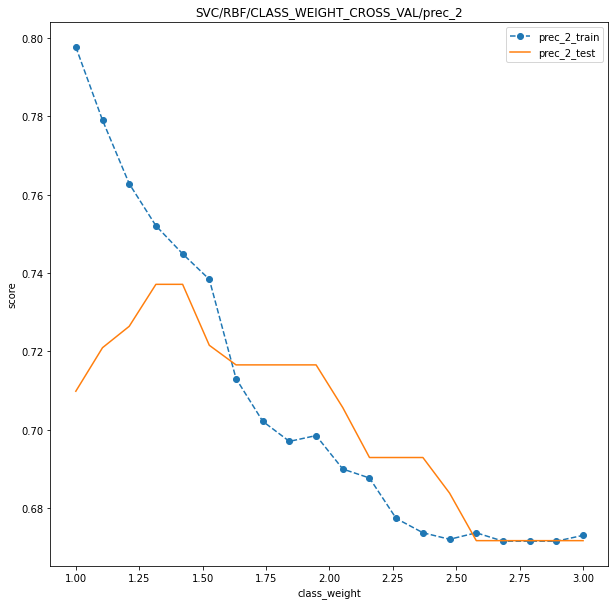

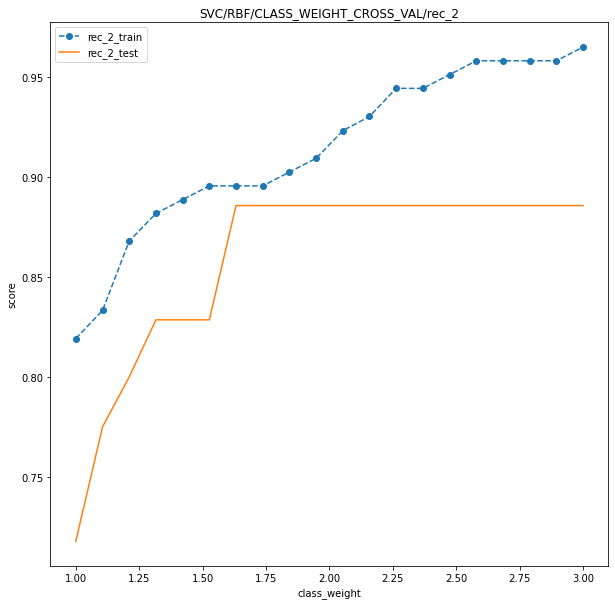

<Figure size 720x720 with 0 Axes>

In [49]:
plot(std_result, np.linspace(1, 3, 20), list(scores.keys()), 'SVC/RBF/CLASS_WEIGHT_CROSS_VAL', 'class_weight', 'score', 'class_weight', 'SVC', 'Standard')

## 2 seems to be a resonable choice

In [55]:
new_std_pipe = Pipeline([('transformer', StandardScaler()),
                         ('model', SVC(class_weight = {0:1, 1:1, 2:2}))])

In [56]:
new_grid = GridSearchCV(estimator = new_std_pipe, 
                        param_grid = {'model__C':np.linspace(1, 5, 50)},
                        n_jobs = -1,
                        scoring = scores,
                       refit = 'prec_0',
                       return_train_score = True)

In [57]:
new_grid.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer', StandardScaler()),
                                       ('model',
                                        SVC(class_weight={0: 1, 1: 1, 2: 2}))]),
             n_jobs=-1,
             param_grid={'model__C': array([1.        , 1.08163265, 1.16326531, 1.24489796, 1.32653061,
       1.40816327, 1.48979592, 1.57142857, 1.65306122, 1.73469388,
       1.81632653, 1.89795918, 1.97959184, 2.06122449, 2.14285714,
       2.2244898 , 2.30612245, 2.3877551 , 2.4693...
       3.85714286, 3.93877551, 4.02040816, 4.10204082, 4.18367347,
       4.26530612, 4.34693878, 4.42857143, 4.51020408, 4.59183673,
       4.67346939, 4.75510204, 4.83673469, 4.91836735, 5.        ])},
             refit='prec_0', return_train_score=True,
             scoring={'prec_0': make_scorer(prec_0),
                      'prec_1': make_scorer(prec_1),
                      'prec_2': make_scorer(prec_2),
                      'rec_0': make_scorer(rec_0), 'rec_1': make

In [58]:
new_std_result = pd.DataFrame(new_grid.cv_results_)

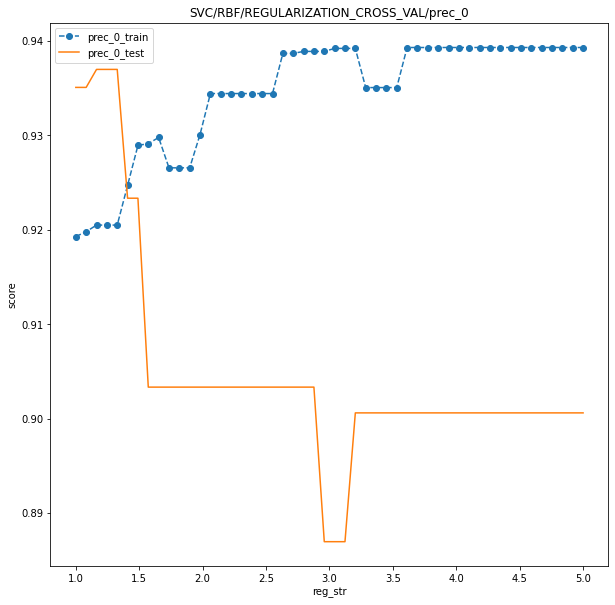

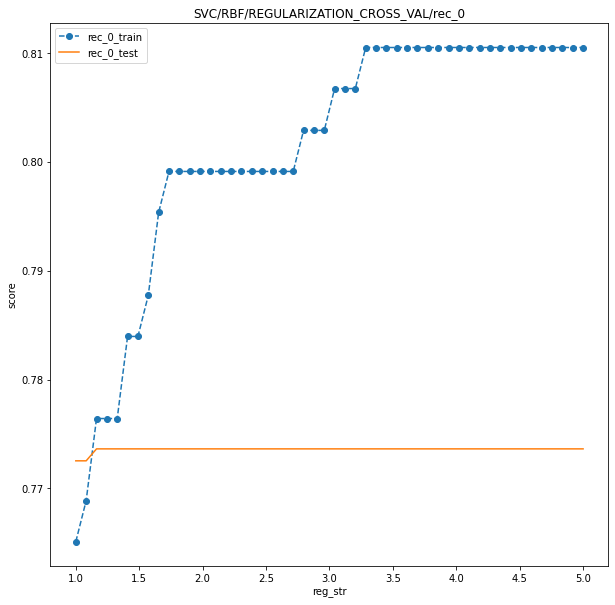

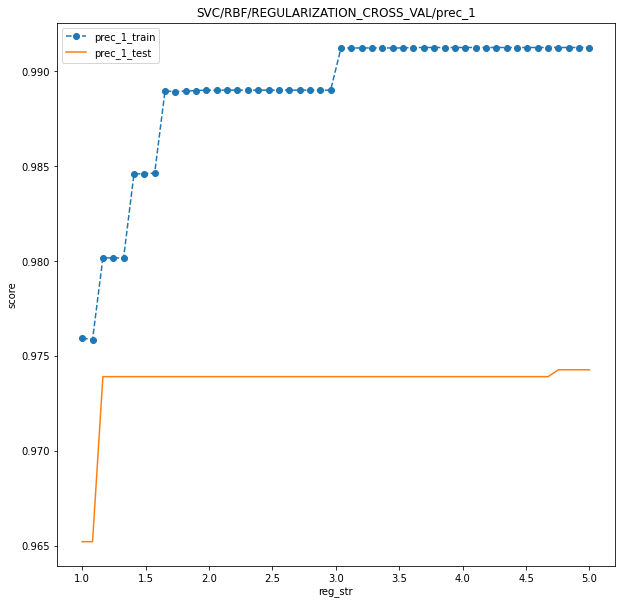

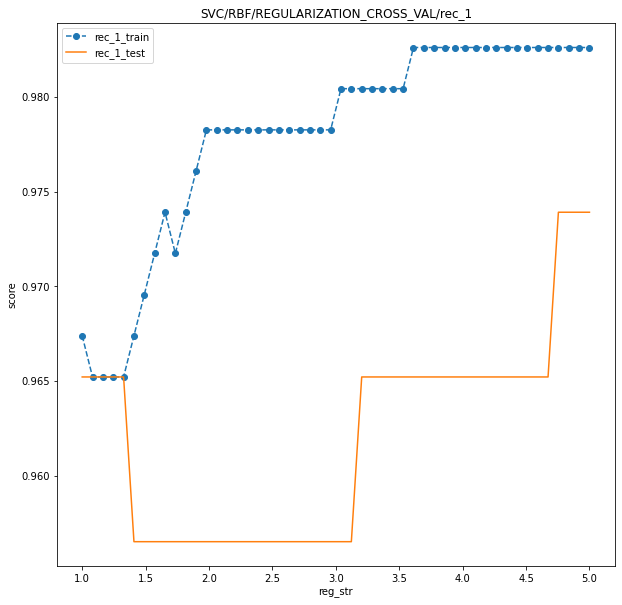

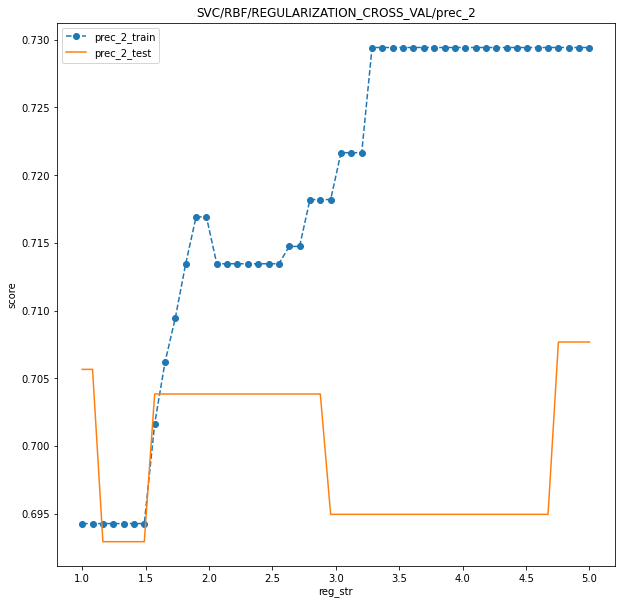

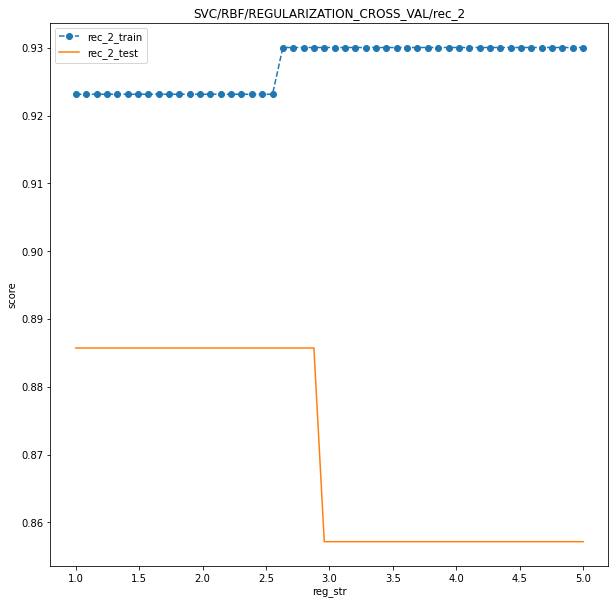

<Figure size 720x720 with 0 Axes>

In [60]:
plot(new_std_result, np.linspace(1, 5, 50), list(scores.keys()), 'SVC/RBF/REGULARIZATION_CROSS_VAL', 'reg_str', 'score', 'reg_str', 'SVC', 'Standard')

## 2 seems a good choice

In [61]:
final_std_pipe = Pipeline([('transformer', StandardScaler()),
                           ('model', SVC(class_weight = {0:1, 1:1, 2:2}, C = 2))])

In [62]:
final_std_pipe.fit(x_train, y_train)

Pipeline(steps=[('transformer', StandardScaler()),
                ('model', SVC(C=2, class_weight={0: 1, 1: 1, 2: 2}))])

In [63]:
eval_score(y_train, final_std_pipe.predict(x_train))

{'prec_0': 0.9298245614035088,
 'rec_0': 0.803030303030303,
 'prec_1': 0.9912280701754386,
 'rec_1': 0.9826086956521739,
 'prec_2': 0.717391304347826,
 'rec_2': 0.9166666666666666}

In [64]:
eval_score(y_test, final_std_pipe.predict(x_test))

{'prec_0': 0.75,
 'rec_0': 0.7058823529411765,
 'prec_1': 0.9705882352941176,
 'rec_1': 0.9428571428571428,
 'prec_2': 0.6296296296296297,
 'rec_2': 0.7083333333333334}

## SVC with Standard Scaling Testing Performance

#### Normal Precision : 0.75
#### Normal Recall : 0.705
#### Spondylolisthesis Precision : 0.970
#### Spondylolisthesis Recall : 0.942
#### Disk Hernia Precision : 0.629
#### Disk Hernia Recall : 0.708

In [67]:
x_train.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

## SVC with Robust and Standard scalers

In [72]:
def create_column_transformer():
    ct = ColumnTransformer([('standard', StandardScaler(), ['pelvic_tilt', 'sacral_slope', 'pelvic_radius']),
                       ('robust', RobustScaler(), ['pelvic_incidence', 'lumbar_lordosis_angle', 'degree_spondylolisthesis'])],
                      remainder = 'drop')
    return ct

In [73]:
new_pipe = Pipeline([('transformer', create_column_transformer()),
                     ('model', SVC())])

In [74]:
grid_new = GridSearchCV(estimator = new_pipe,
                        param_grid = {'model__class_weight':[{0:1, 1:1, 2:i} for i in np.linspace(1, 3, 20)]},
                       scoring = scores, 
                       n_jobs = -1,
                    refit = 'prec_0',
                       return_train_score = True)

In [75]:
grid_new.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['pelvic_tilt',
                                                                          'sacral_slope',
                                                                          'pelvic_radius']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['pelvic_incidence',
                                                                          'lumbar_lordosis_angle',
                                                                          'degree_spondylolisthesis'])])),
                         

In [76]:
new_result = pd.DataFrame(grid_new.cv_results_)

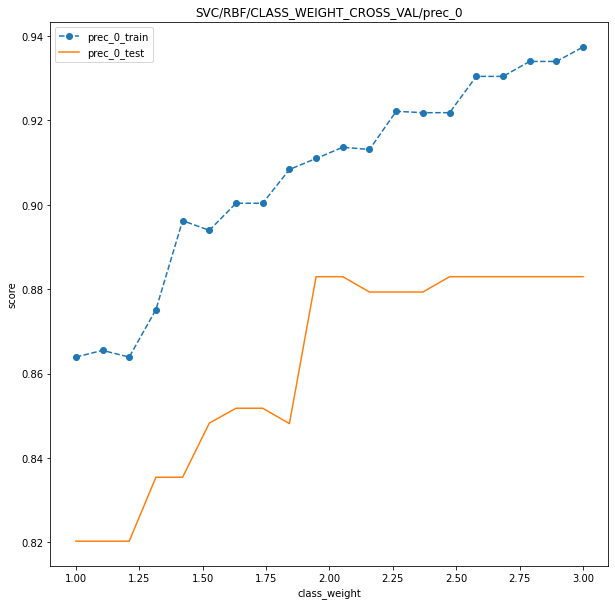

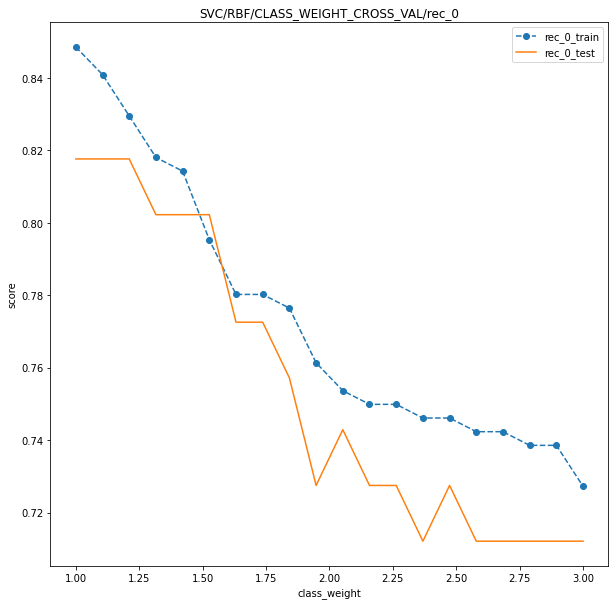

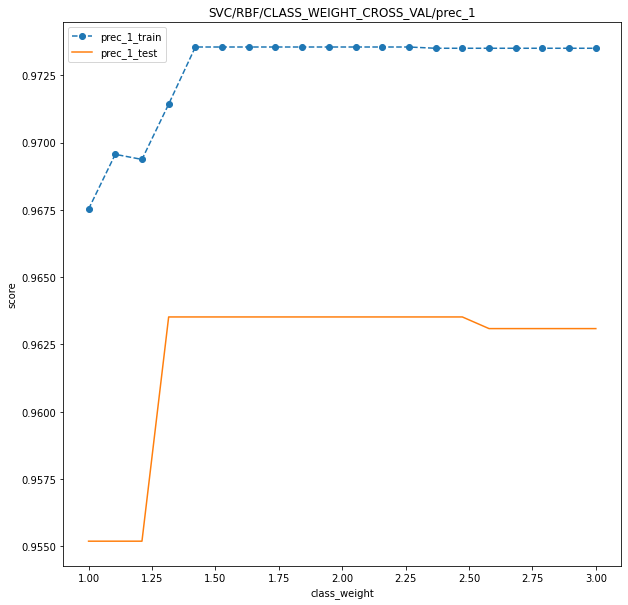

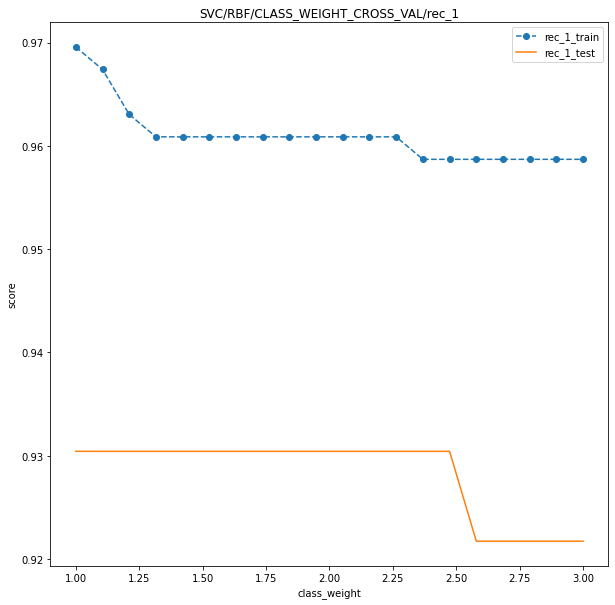

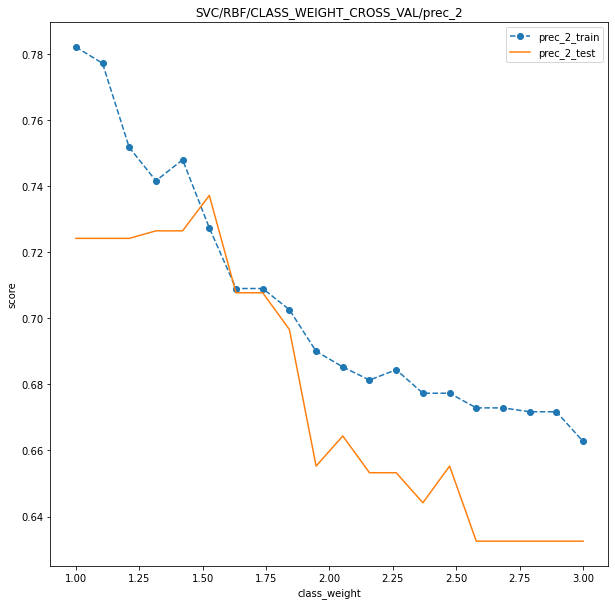

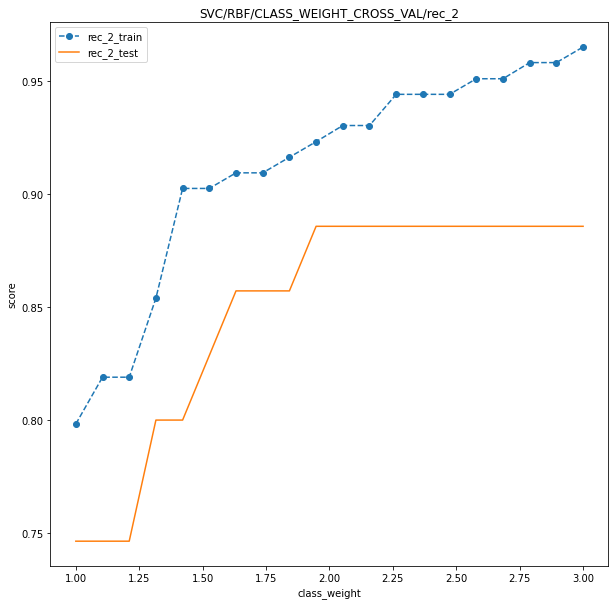

<Figure size 720x720 with 0 Axes>

In [77]:
plot(new_result, np.linspace(1, 3, 20), list(scores.keys()), 'SVC/RBF/CLASS_WEIGHT_CROSS_VAL', 'class_weight', 'score', 'class_weight', 'SVC', 'CT')

## 1.5 seems like a reasonable choice

In [78]:
new_pipe = Pipeline([('transformer', create_column_transformer()),
                     ('model', SVC(class_weight = {0:1, 1:1, 2:1.5}))])

In [79]:
grid_new = GridSearchCV(estimator = new_pipe,
                       param_grid = {'model__C':np.linspace(1, 5, 50)},
                       scoring = scores,
                       refit = 'prec_0',
                       n_jobs = -1,
                       return_train_score = True)

In [80]:
grid_new.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['pelvic_tilt',
                                                                          'sacral_slope',
                                                                          'pelvic_radius']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['pelvic_incidence',
                                                                          'lumbar_lordosis_angle',
                                                                          'degree_spondylolisthesis'])])),
                         

In [81]:
res_new = pd.DataFrame(grid_new.cv_results_)

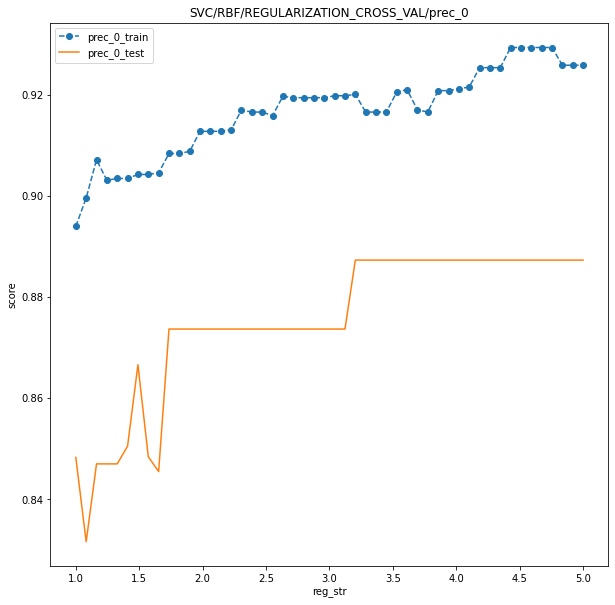

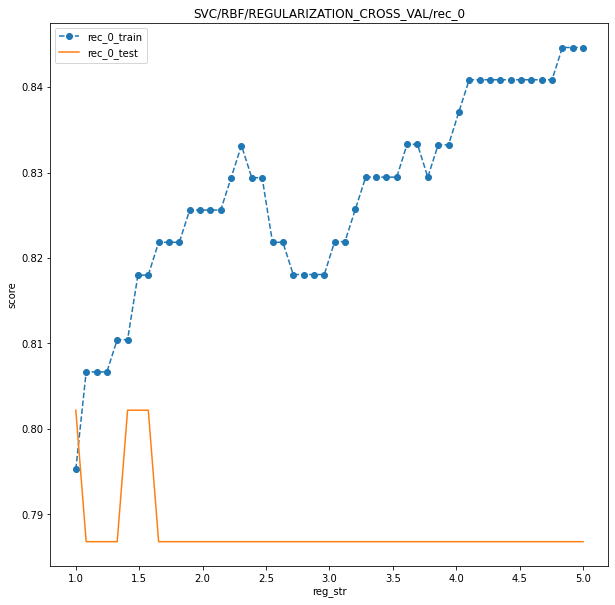

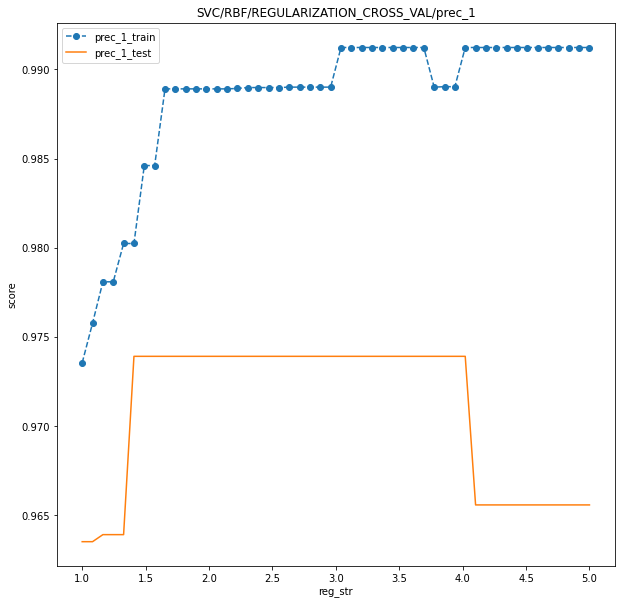

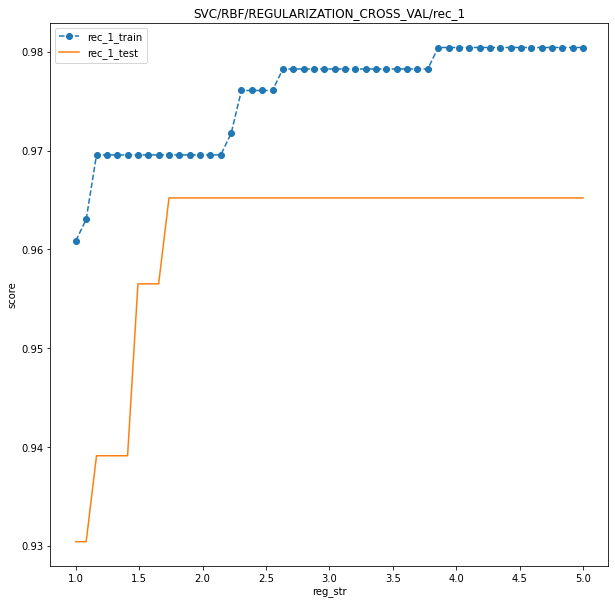

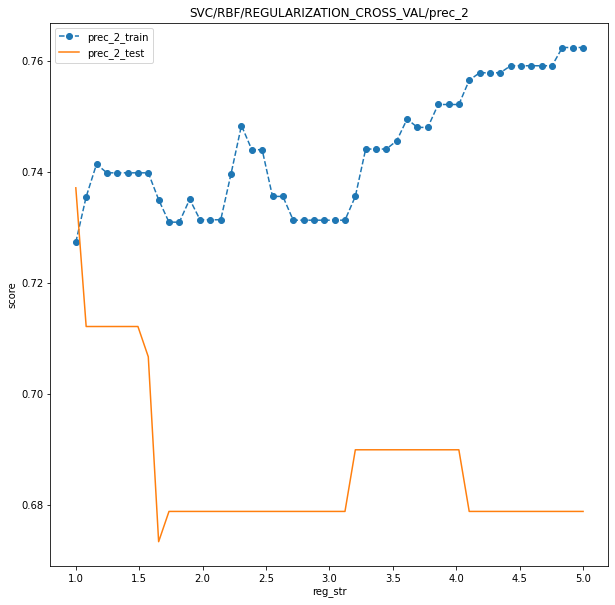

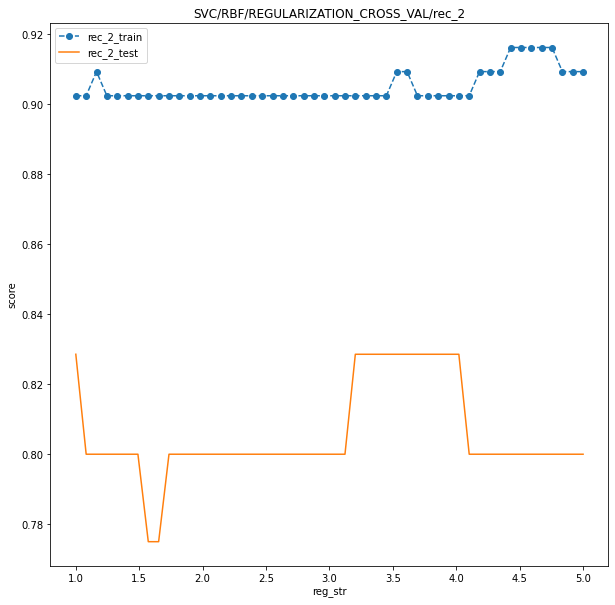

<Figure size 720x720 with 0 Axes>

In [82]:
plot(res_new, np.linspace(1, 5, 50), list(scores.keys()), 'SVC/RBF/REGULARIZATION_CROSS_VAL', 'reg_str', 'score', 'reg_str', 'SVC', 'CT')

## 1.5 is a reasonable choice

In [83]:
new_pipe = Pipeline([('transformer', create_column_transformer()),
                     ('model', SVC(class_weight = {0:1, 1:1, 2:1.5}, C = 1.5))])

In [84]:
new_pipe.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['pelvic_tilt',
                                                   'sacral_slope',
                                                   'pelvic_radius']),
                                                 ('robust', RobustScaler(),
                                                  ['pelvic_incidence',
                                                   'lumbar_lordosis_angle',
                                                   'degree_spondylolisthesis'])])),
                ('model', SVC(C=1.5, class_weight={0: 1, 1: 1, 2: 1.5}))])

In [85]:
eval_score(y_train, new_pipe.predict(x_train))

{'prec_0': 0.9016393442622951,
 'rec_0': 0.8333333333333334,
 'prec_1': 0.9910714285714286,
 'rec_1': 0.9652173913043478,
 'prec_2': 0.7272727272727273,
 'rec_2': 0.8888888888888888}

In [86]:
eval_score(y_test, new_pipe.predict(x_test))

{'prec_0': 0.6842105263157895,
 'rec_0': 0.7647058823529411,
 'prec_1': 0.9428571428571428,
 'rec_1': 0.9428571428571428,
 'prec_2': 0.65,
 'rec_2': 0.5416666666666666}